In [ ]:
# !pip install pycaret

In [ ]:
from pycaret.datasets import get_data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessamento

A etapa de preprocessamento é a primeira etapa a ser realizada antes de aplicarmos o nosos modelo de Machine Learning, dentro do scikit-learn podemos encontrar as mais diversas funções para isso, como: **StandardScaler, MinMaxScaler, Normalizer, Binarizer, Imputers** etc.

## Escalares

-**Min Max** ~~ **MaxAbsScaler**
E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com **range entre 0 e 1**. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler(). **O AbsScaler** é ideal para **dados esparsos**, e transforma os dados entre [-1 e 1]. 

-**STDscaler**
Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrões em uma **distribuição Gaussiana** com a **média igual a 0 e desvio padrão igual a 1**. Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona bem quando os dados já estão na mesma escala. O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

-**Binarazing**
Nós podemos definir um valor em nossos dados, ao qual chamamos de threshold e então definimos que todos os valores acima do threshold serão marcados como sendo 1 e todos valores iguais ou abaixo do threshold serão marcados como sendo 0. Isso é o que chamamos de Binarizing. Isso é útil quando temos **probabilidades e queremos transformar os dados em algo com mais significado**. O scikit-learn possui uma função para esta etapa, chamada Binarizer().

-**Normalizer**
No scikit-learn, normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear). Este método de pré-processamento é **útil quando temos datasets esparsos (com muitos zeros) e atributos com escala muito variada**. Útil quando usamos algoritmos de redes neurais ou que usam medida de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada Normalizer().

-**Robust Scaler**
Igual ao standardscaler, porém não necessita de uma distribuição normal, e utiliza o intervalo **interquartil para lidar com dados outliers**.

-**Quantile Transformer** e **Power Transformer**
  Quantile transformer pode ser util em distribuições bimodal e uniform.
  
  output_distribution = 'normal'

In [20]:
# Exemplo
X = df.drop('species',axis=1)                # Nossos dados de X
print('Antes Da Escala')
display(X.head(5))
Y = df.species
scaler = StandardScaler()                         # Criando nosso scaler
scalado_X = scaler.fit_transform(X)               # Fitando e transformando nossos itens
new_x = pd.DataFrame(scalado_X,columns=X.columns.tolist())
print('Depois Da Escala')
display(new_x.head(5))

Antes Da Escala


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Depois Da Escala


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


**Desvantagens:**

**STD** : não é bom se os dados não forem normalmente distribuídos (ou seja, sem distribuição gaussiana).

**Normalizer** : seja fortemente influenciado por valores discrepantes (ou seja, valores extremos).

**Robust Scaler** : não leva em consideração a mediana e foca apenas nas partes onde estão os dados em massa.


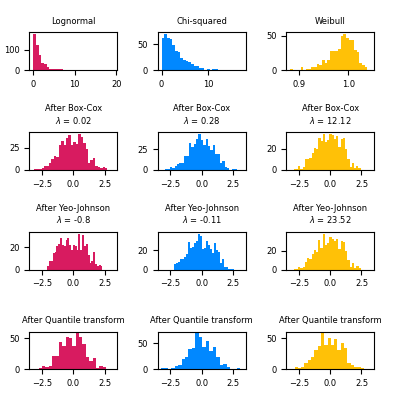 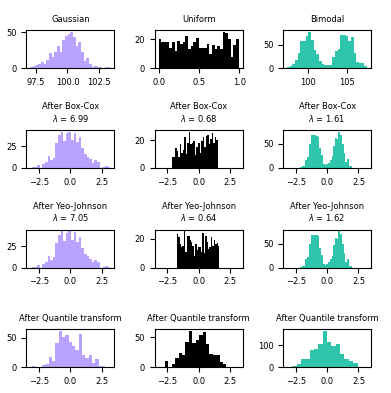

### Escalando Variavel *Target*

Varios modelos funcionam de melhor maneira com a variável target em uma distribuição normal, para isso podemos utilizar alguns métodos para atingir esse resultado, transformar a várivel em Log, Sqrt, BoxCox etc.

**Log** > **np.log()**

Sqrt > **np.sqrt()**

from scipy.stats import boxcox > **boxcox()**

para aplicar o **boxcox** também pode ser usado o **PowerTransformer** do sklearn. (**BoxCox só funciona com dados positivos**)

from scipy.special import inv_boxcox > **inv_boxcox()**

Utilizaremos o teste normal para aceitar ou rejeitar a hipotese.

from scipy.stats.mstats import normaltest > **normaltest()**


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)


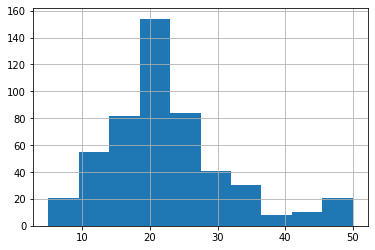

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)


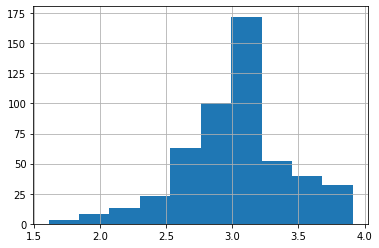

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)


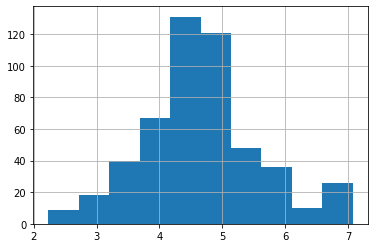

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)


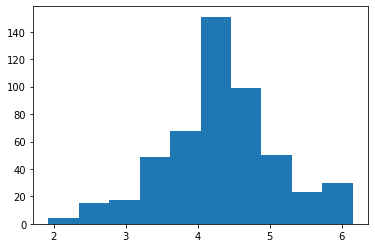

In [42]:
from scipy.stats.mstats import normaltest # teste normal       # Teste normal

df_norm_target = get_data('boston')

print(normaltest(df_norm_target['medv']))
df_norm_target['medv'].hist()
plt.show()

print(normaltest(np.log(df_norm_target['medv'])))               # Usando LOG
np.log(df_norm_target['medv']).hist()
plt.show()

print(normaltest(np.sqrt(df_norm_target['medv'])))              # Usando SQRT
np.sqrt(df_norm_target['medv']).hist()
plt.show()

from scipy.stats import boxcox                                  # Usando Box Cox
resultado_box_cox = boxcox(df_norm_target.medv)
print(normaltest(resultado_box_cox[0]))
plt.hist(resultado_box_cox[0])
plt.show()

from scipy.special import inv_boxcox                            # Invertendo Box Cox
cox_result = inv_boxcox(resultado_box_cox[0],resultado_box_cox[1])

## Encoders

**OneHotEncoder** texto em negrito> Igual ao get_dummies atribui uma coluna nova para cada dado catégorico.

**Podemos usar o pd.get_dummies(colunas,data)**

**LabelEnconder**> Atribui um valor numerico para cada dado de uma coluna.



In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Escala Polynomial
Escalas polinomiais tem objetivo de aumentar a nossa quantidade de colunas, tornando assim o nosso fit de modelo mais robusto.

**PolynomialFeatures**> A polynomial features, é capaz de com o grau de um determinado polinomio, dividir em diversos eixos os nossos dados no espaço.

**SplineTransformer**> Uma opção ao polynomial features, pois ele pode ser mais robusto em maiores dimensões.


## Função que aplica diversas escalas

**FunctionTransformer**> A fuction transformer é capaz de aplicar diversas escalas em nossos dados, sendo as escalas de nossas escolhas.

# Nesse caso utilizaremos o log1p.


In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)

# Imputer

A função de um imputer é substituir os dados NaNs de um determinado Dataset por outros dados.

**SimpleImputer**> O simpleImputer imputa dados de acordo com uma metrica.

**KNNImputer**> Usa distancia euclediana para fazer a substituição.

**IterativeImputer**> Utiliza de predição para substituir os dados nulos.

In [44]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


# PCA e SVD

**Antes de reduzir a dimensionalidade dos dados é necessário sempre escalalos.**


Pre PCA


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Pos PCA


,PCA1,PCA2,Target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


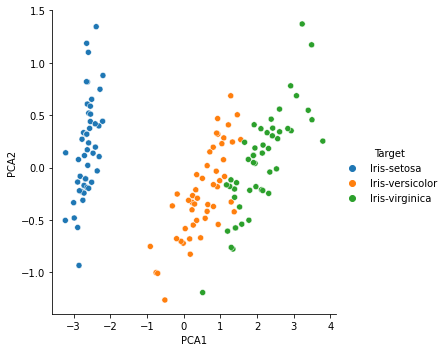

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2'])
print('Pre PCA')
display(X.head(5))
df_pca['Target'] = Y
print('Pos PCA')
display(df_pca.head(5))
sns.relplot(x='PCA1',y='PCA2',data=df_pca,hue='Target')
plt.show()

In [52]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

Pre svd


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Pos svd


,svd1,svd2,Target
0,5.912204,2.303442,Iris-setosa
1,5.572076,1.973831,Iris-setosa
2,5.446485,2.096533,Iris-setosa
3,5.436019,1.871681,Iris-setosa
4,5.875066,2.329348,Iris-setosa


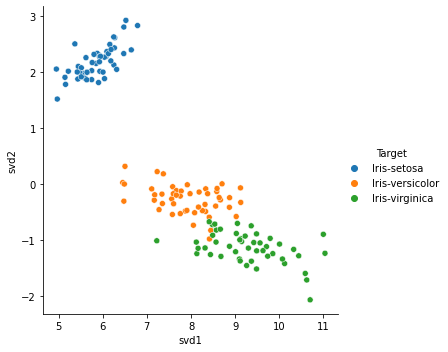

In [49]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_svd,columns=['svd1','svd2'])
print('Pre svd')
display(X.head(5))
df_svd['Target'] = Y
print('Pos svd')
display(df_svd.head(5))
sns.relplot(x='svd1',y='svd2',data=df_svd,hue='Target')
plt.show()

In [51]:
svd.explained_variance_ratio_

array([0.53028106, 0.44685765])